In [1]:

import pandas as pd

file_path = r'C:\Users\astratova140433\Desktop\Алена Астратова\Обучение моделям\Machine Learning Engineer\normal_data.csv'
file_path1 = r'C:\Users\astratova140433\Desktop\Алена Астратова\Обучение моделям\Machine Learning Engineer\skewed_df.csv'
df = pd.read_csv(file_path, delimiter=',')
df1 = pd.read_csv(file_path1, delimiter=',')
df.head()


,id,price,area,rooms,district
0,1,11.0,85.0,5,B
1,2,9.7,88.0,5,C
2,3,11.3,96.0,3,C
3,4,13.0,96.0,3,B
4,5,9.5,59.0,5,B


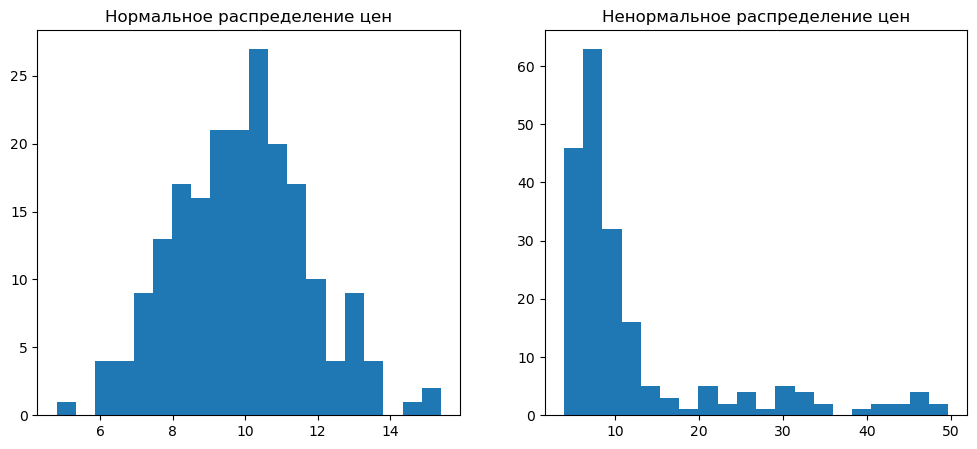

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=20)
plt.title('Нормальное распределение цен')

plt.subplot(1, 2, 2)
plt.hist(df1['price'], bins=20)
plt.title('Ненормальное распределение цен')
plt.show()

In [3]:
from scipy import stats

**Тест Шапиро-Уилка**

In [4]:
stats.shapiro(df.price) # 0.16>0.05 значит данные распределены нормально

ShapiroResult(statistic=0.9954105615615845, pvalue=0.8082764148712158)

In [5]:
stats.shapiro(df1.price) # <0.05 значит данные не распределены нормально

ShapiroResult(statistic=0.6772615909576416, pvalue=2.458047323323163e-19)

  **Тест Колмогорова-Смирнова (для больших выборок)** 



Берет столбец price из DataFrame df
Удаляет пропущенные значения (dropna())

Проверяет на соответствие нормальному распределению с параметрами:

- среднее (mean)

- стандартное отклонение (std) из самих данных

Результат выводится в виде кортежа: (статистика, p-value)

Для интерпретации:

Если p-value > 0.05 - распределение не отличается от нормального

Если p-value <= 0.05 - распределение ненормальное

In [6]:
from scipy.stats import kstest

In [7]:
kstest(df.price.dropna(), 'norm', args=(df.price.mean(), df.price.std()))

KstestResult(statistic=0.04254637444113718, pvalue=0.8466506495228556, statistic_location=10.8, statistic_sign=1)

In [8]:
kstest(df1.price.dropna(), 'norm', args=(df1.price.mean(), df1.price.std()))

KstestResult(statistic=0.28559865923025174, pvalue=6.230454329280864e-15, statistic_location=12.126, statistic_sign=1)

**Проверим гипотезу:**

Нулевая гипотеза (H₀): Цены в районах A и C не различаются.

Альтернатива (H₁): Цены различаются.

Решение:

Если p-value < 0.05 → отвергаем H₀ (различия статистически значимы).

Если p-value ≥ 0.05 → недостаточно оснований отвергнуть H₀.

In [9]:
# Фильтрация по району 'A'
df_a = df[df['district'] == 'A'].copy() 
df_a.head()

,id,price,area,rooms,district
6,7,13.2,88.0,3,A
9,10,11.1,138.0,3,A
10,11,9.1,89.0,4,A
16,17,8.0,68.0,3,A
18,19,8.2,73.0,4,A


In [10]:
# Фильтрация по району 'С'
df_c = df[df['district'] == 'C'].copy() 
df_c.head()

,id,price,area,rooms,district
1,2,9.7,88.0,5,C
2,3,11.3,96.0,3,C
5,6,9.5,66.0,4,C
7,8,11.5,88.0,3,C
14,15,6.6,75.0,3,C


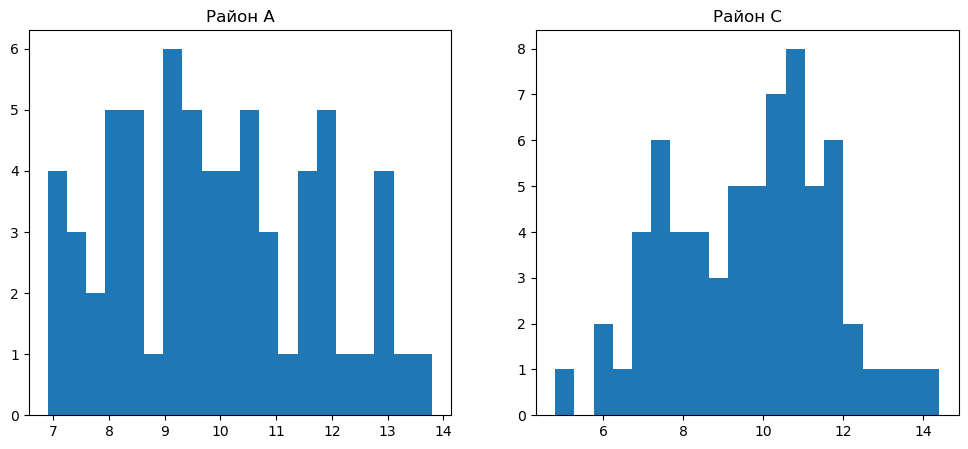

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_a['price'], bins=20)
plt.title('Район A')

plt.subplot(1, 2, 2)
plt.hist(df_c['price'], bins=20)
plt.title('Район C')
plt.show()

Тест Шапиро-Уилка

In [12]:
stats.shapiro(df_a.price) # 0.11>0.05 значит данные распределены нормально

ShapiroResult(statistic=0.9693997502326965, pvalue=0.10727391391992569)

In [13]:
stats.shapiro(df_c.price) # 0.53>0.05 значит данные распределены нормально

ShapiroResult(statistic=0.9837847948074341, pvalue=0.5323399305343628)

**Тест Левена**

Используется для проверки следующей гипотезы:

`H0: Выборки имеют равные дисперсии`

In [14]:
stats.levene(df_a.price, df_c.price) # 0.345>0.05 значит дисперсии равны

LeveneResult(statistic=0.8982557214660705, pvalue=0.34500830352744627)

**Т-Критерий Стьюдента**

Используется для проверки следующей гипотезы:

`H0: Средние в выборках равны`

In [15]:
stats.ttest_ind(df_a.price, df_c.price) #> 0.05 значит цены в районах не различаются

Ttest_indResult(statistic=0.8424397235992488, pvalue=0.4010890815967827)

Загрузим новый датафрейм

In [16]:
file_path2 = r'C:\Users\astratova140433\Desktop\Алена Астратова\Обучение моделям\Machine Learning Engineer\df_district.csv'
df_district = pd.read_csv(file_path2, delimiter=',')
df_district.head()

,Район D (₽),Район E (₽)
0,10496714,4169258
1,9861735,6158709
2,10647688,6314570
3,11523029,5395445
4,9765846,6677428


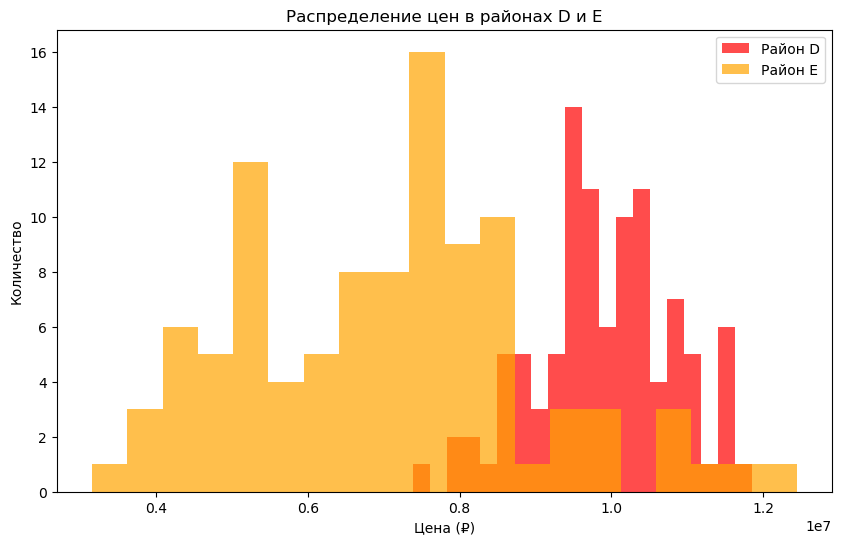

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_district['Район D (₽)'], bins=20, alpha=0.7, label='Район D', color='red')
plt.hist(df_district['Район E (₽)'], bins=20, alpha=0.7, label='Район E', color='orange')
plt.legend()
plt.title('Распределение цен в районах D и E')
plt.xlabel('Цена (₽)')
plt.ylabel('Количество')
plt.show()

In [18]:
print(stats.shapiro(df_district['Район D (₽)'],) )
print(stats.shapiro(df_district['Район E (₽)'],) )

ShapiroResult(statistic=0.9898831844329834, pvalue=0.6551515460014343)
ShapiroResult(statistic=0.9775339365005493, pvalue=0.08525514602661133)


In [19]:
stats.levene(df_district['Район D (₽)'], df_district['Район E (₽)']) # pvalue>0.05 значит дисперсии НЕ равны

LeveneResult(statistic=36.988271512443276, pvalue=6.024094989636399e-09)

**Т-Критерий Уэлча**

Модификация критерия Стьюдента для выборок с неравными дисперсиями

In [20]:
stats.ttest_ind(df_district['Район D (₽)'], df_district['Район E (₽)'], equal_var=False) # pvalue< 0.05 значит цены в районах различаются

Ttest_indResult(statistic=13.49835658506654, pvalue=3.2344662390897636e-27)

In [21]:
stats.ttest_ind(df_district['Район D (₽)'], df_district['Район E (₽)'], equal_var=False, alternative='greater') #проверяем выше ли цены в районе D

Ttest_indResult(statistic=13.49835658506654, pvalue=1.6172331195448818e-27)

In [23]:
stats.ttest_ind(df_district['Район D (₽)'], df_district['Район E (₽)'], equal_var=False, alternative='less') #проверяем ниже ли цены в районе D

Ttest_indResult(statistic=13.49835658506654, pvalue=1.0)

|
|
|


**Проверим гипотезу:**

Нулевая гипотеза (H₀): Цены в районах A и B не различаются.

Альтернатива (H₁): Цены различаются.

Решение:

Если p-value < 0.05 → отвергаем H₀ (различия статистически значимы).

Если p-value ≥ 0.05 → недостаточно оснований отвергнуть H₀.

In [24]:
# Фильтрация по району 'С'
df_b = df[df['district'] == 'B'].copy() 
df_b.head()

,id,price,area,rooms,district
0,1,11.0,85.0,5,B
3,4,13.0,96.0,3,B
4,5,9.5,59.0,5,B
8,9,9.1,88.0,5,B
11,12,9.1,97.0,5,B


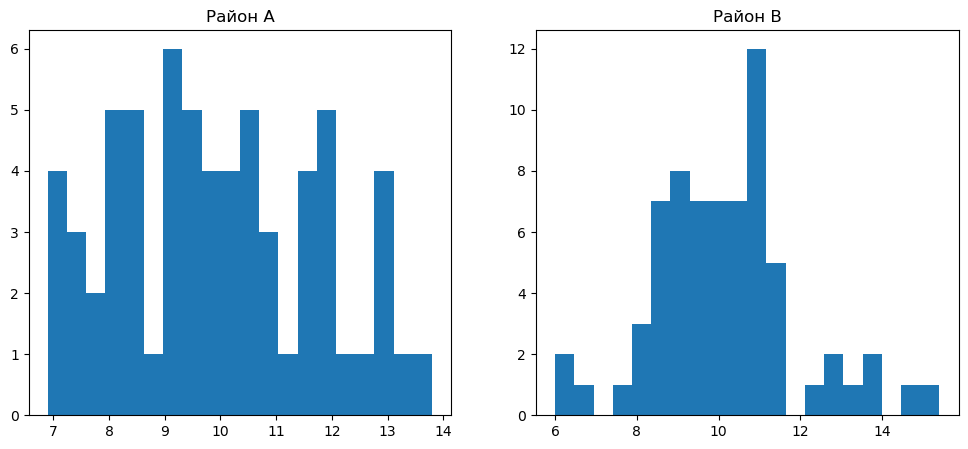

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_a['price'], bins=20)
plt.title('Район A')

plt.subplot(1, 2, 2)
plt.hist(df_b['price'], bins=20)
plt.title('Район B')
plt.show()

In [26]:
stats.shapiro(df_b.price) # 0.027<0.05 значит данные НЕ распределены нормально

ShapiroResult(statistic=0.9597381353378296, pvalue=0.027475988492369652)

**Критерий Манна Уитни**

Используется для проверки следующей гипотезы на выборках, которые не удовлетворяют условию о нормальном распределении:

`H0:  Распределение, лежащее в основе выборки x, совпадает с распределением, лежащим в основе выборки y `

In [27]:
stats.mannwhitneyu(df_a.price, df_b.price, alternative='greater') # Критерий Манна — Уитни не обнаружил значимых различий между районами

MannwhitneyuResult(statistic=2047.5, pvalue=0.7685075504443422)

А что на счет зависимых выборок?

In [28]:
file_path3 = r'C:\Users\astratova140433\Desktop\Алена Астратова\Обучение моделям\Machine Learning Engineer\df_repair.csv'
df_repair = pd.read_csv(file_path3, delimiter=',')
df_repair.head()

,Стоимость до ремонта (₽),Стоимость после ремонта (₽)
0,5496714,6505913
1,4861735,5636550
2,5647688,6334617
3,6523029,7751794
4,4765846,6172466


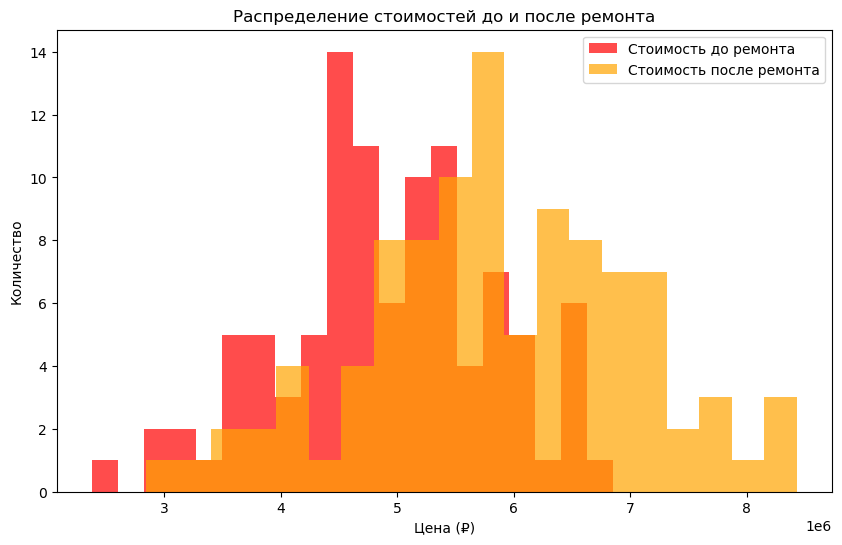

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_repair['Стоимость до ремонта (₽)'], bins=20, alpha=0.7, label='Стоимость до ремонта', color='red')
plt.hist(df_repair['Стоимость после ремонта (₽)'], bins=20, alpha=0.7, label='Стоимость после ремонта', color='orange')
plt.legend()
plt.title('Распределение стоимостей до и после ремонта')
plt.xlabel('Цена (₽)')
plt.ylabel('Количество')
plt.show()

In [30]:
print(stats.shapiro(df_repair['Стоимость до ремонта (₽)'],) )
print(stats.shapiro(df_repair['Стоимость после ремонта (₽)'],) )
## pvalue>0.05 значит данные распределены нормально

ShapiroResult(statistic=0.9898831844329834, pvalue=0.6551515460014343)
ShapiroResult(statistic=0.9924891591072083, pvalue=0.8554307222366333)


**Парный Т-критерий**

Используется для проверки следующей гипотезы на *зависимых* выборках:

`H0: Средние в выборках равны`

In [31]:
stats.ttest_rel(df_repair['Стоимость до ремонта (₽)'], df_repair['Стоимость после ремонта (₽)'], alternative='less')
#  после ремонта цены значительно выросли.

TtestResult(statistic=-27.007124048753358, pvalue=9.13072356873812e-48, df=99)

In [33]:
stats.ttest_rel(df_repair['Стоимость до ремонта (₽)'], df_repair['Стоимость после ремонта (₽)'], alternative='greater')

TtestResult(statistic=-27.007124048753358, pvalue=1.0, df=99)

**Знаковый ранговый тест Вилкоксона**

Используется для проверки следующей гипотезы на зависимых выборках, которые не удовлетворяют условию о нормальном распределении:

`H0:  Выборки x и y происходят из одного распределения `

In [34]:
file_path3 = r'C:\Users\astratova140433\Desktop\Алена Астратова\Обучение моделям\Machine Learning Engineer\df_repair1.csv'
df_repair1 = pd.read_csv(file_path3, delimiter=',')
df_repair1.head()

,Стоимость до ремонта (₽),Стоимость после ремонта (₽)
0,3987542,4719834
1,3093130,3612520
2,4235768,4747657
3,6011662,7154761
4,2976738,3867053


c:\Users\astratova140433\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\astratova140433\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


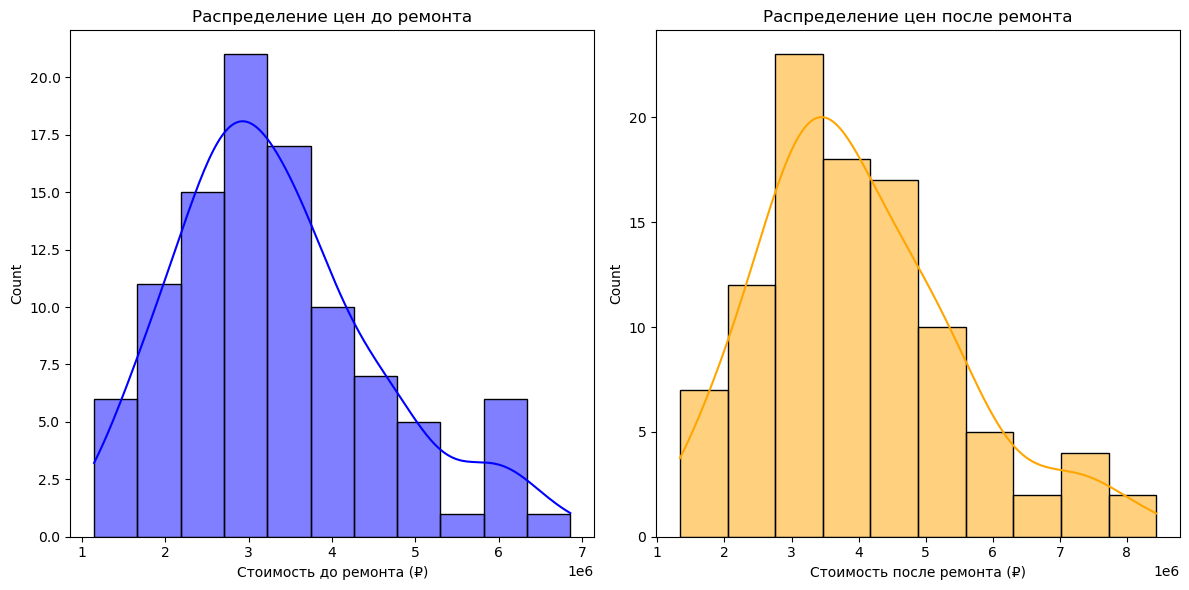

In [35]:
# Визуализация распределений
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_repair1['Стоимость до ремонта (₽)'], kde=True, color='blue')
plt.title('Распределение цен до ремонта')

plt.subplot(1, 2, 2)
sns.histplot(df_repair1['Стоимость после ремонта (₽)'], kde=True, color='orange')
plt.title('Распределение цен после ремонта')

plt.tight_layout()
plt.show()

In [36]:
print(stats.shapiro(df_repair1['Стоимость до ремонта (₽)'],) )
print(stats.shapiro(df_repair1['Стоимость после ремонта (₽)'],) )
## pvalue<0.05 значит данные распределены НЕ нормально

ShapiroResult(statistic=0.9549973011016846, pvalue=0.0017973082140088081)
ShapiroResult(statistic=0.9591026902198792, pvalue=0.0034721919801086187)


In [37]:
stats.wilcoxon(df_repair['Стоимость до ремонта (₽)'], df_repair['Стоимость после ремонта (₽)'], alternative='greater')

WilcoxonResult(statistic=0.0, pvalue=1.0)

In [38]:
stats.wilcoxon(df_repair['Стоимость до ремонта (₽)'], df_repair['Стоимость после ремонта (₽)'], alternative='less')

WilcoxonResult(statistic=0.0, pvalue=1.9482799225479546e-18)

**Корреляция**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

По умолчанию Pandas всегда применяет Коэффициент Пирсона

In [41]:
df_repair.corr()

,Стоимость до ремонта (₽),Стоимость после ремонта (₽)
Стоимость до ремонта (₽),1.000000,0.967292
Стоимость после ремонта (₽),0.967292,1.000000


In [42]:
from scipy.stats import pearsonr, spearmanr

In [40]:
spearman_corr = df_repair1.corr(method='spearman')
print("\nМатрица корреляций (Спирмен):\n", spearman_corr)


Матрица корреляций (Спирмен):
                              Стоимость до ремонта (₽)  \
Стоимость до ремонта (₽)                     1.000000   
Стоимость после ремонта (₽)                  0.989163   

                             Стоимость после ремонта (₽)  
Стоимость до ремонта (₽)                        0.989163  
Стоимость после ремонта (₽)                     1.000000  
